# Incorporating "Word of Mouth" as a parameter in FinTech models

September 2nd 2025

By Johan Varghese Kennady
<br>24b1223

##Overview

This project aims to highlight the importance of considering "Word of Mouth"- in particular, social media sentiment.

It is important to note that WOM is a significant factor in effective marketing, apart from marketing budget. For instance, poor marketing (unintentional or otherwise) combined with an interesting product can lead to great results if the marketing is picked up by social media meme culture. This could be either due to it being in bad taste (but innocent!), containing divisive elements, or simple dumb luck.
Some examples are:
*   Snapple
*   Wendy's on twitter
*   The Minecraft movie and Pixar's Elemental

At the same time, social media visibility sometimes does not translate to real sales at all. This is true of course for essential goods and services and similar. On the other end, particularly inflammatory marketing could lead to negative press and boycott. (H&M's "racist" ad in 2018, which lead to massive backlash- to the extent of vandalizing and boycott. H&Ms was forced to give out an apology)


##Methodology

We want the distribution of product success versus the input parameter tuple (m,s) where m is market spend parameter and s is sentiment score.
Our regression line is $$y=w_0+w_1 m + w_2 s$$

First, let us define the terms:

Product success is the number of new users/sales in a given timeframe 't' (say, 1 month)

'm' is the marketing budget during t scaled to [1,10]

's' is the sentiment score measured using posts during t. The next section will discuss the details of this parameter.

Of particular interest is the values of w0, w1 and w2. w1 and w2 can simply be interpreted as weights of how good marketing spend/social media sentiment is as an indicator of good marketing. The meaning of the constant coefficient w0 on the other hand, is harder to pinpoint. It is the sales with no marketing/talk. Thus, it could be said that it is a measure of how essential the good/service is, in combination with how accessible it is in common markets.


##Sentiment Score Calculation

A sentiment analysis will be used to search through different relevant posts across different social media platforms in a particular language. It will map different sentiments to integral values, with great appreciation as +5 and great distaste as -2. <br> Now use these values(say, xi) to calculate the parameter as
$$⌈k(1+\sum_{x_i>0}x_i)(1-\sum_{x_i<0}x_i)⌉$$
Where k is the scaling factor required to keep this value in the range 1 through 10.
<br> This method of calculation is to consider the fact that a healthy amount of dissent is natural and good, also weighing in that high dissent is surely not as good as high praise.


Then, using a predicted reach in different language communities (a rough, naive estimate based on similar product success/similar), weights can be assigned to each parameter, and the final parameter to be used will be a weighted mean of all such parameters.

##FinTech Applications

Consider a banking service that has rolled out a new mobile banking app. <br> The service can utilize their own month/week-wise past data for the distribution. Then, utilizing the linear regression result, they can decide to focus more/cut on marketing budget and social reach get maximum returns on operation.


##Python Implementation and Model Evaluation

Following is the implementation of one and two variable linear regressions using synthetic data considering first only market spend and then both market spend+WOM in sklearn+matplotlib. Aside from plotting, it also computes and compares the R square coefficients of both regressions, as a metric for comparing the effectiveness of the two regressions. However, in this code, it doesn't go beyond the fact that two parameters are better than 1. For true comparison, a real data set would be required.

For the synthetic data, we assume the regression parameters (w0,w1,w2) and then generate market spend as a list of random variables generated in range (1,10). Similarly s is generated as a repeating set of integers from 1,10. Since m is unordered, correlation between m and s is already avoided. The output y is then computed as above + some assumed gaussian noise with s.d. 2.

First step is importing the required libraries, the numPy library for numeric computations of matrix fixing and operations, and the matplotlib library for plotting the results.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

###Data Generation

We begin by simulating a dataset that mimics real-world marketing and sentiment effects. The inputs are two independent variables — marketing spend (m) and sentiment score (s). To make the problem realistic, we introduce Gaussian noise into the output variable (y), which represents product success. This ensures that our regression model is tested against slightly messy, real-world–like data rather than a perfectly clean function.

In [25]:
m=1+9*np.random.rand(100);
s=np.arange(1,11);
s=np.tile(s,10);
w0,w1,w2=5,5,2; #Actual parameters
#Generate y from assumed line+noise
np.random.seed(67)
y=w0+w1*m+w2*s+np.random.normal(0,2,size=len(m))

###Regression with One Feature

The first experiment restricts the model to only one feature (m). By fitting a line to m vs. y, we obtain the best-fit weights using the closed-form solution of linear regression. This allows us to evaluate how well marketing spend alone explains success. The resulting visualization shows the data points alongside the regression line, making it easy to see where the model underestimates or overestimates outcomes.

In [26]:
#Fit regression: y v.s. m only
X_b=np.c_[np.ones((100, 1)), m]
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print("Learned weights for m only:", theta_best.ravel())
y_pred=X_b@theta_best

Learned weights for m only: [17.70457153  4.63142677]


###Regression with Two Features

We then extend the regression model to include both marketing spend (m) and sentiment score (s). This makes the model a plane instead of a line, since it is now fitting a relationship between two independent variables and one dependent variable. By comparing the learned weights, we can quantify how much influence each factor has on the outcome. The 3D visualization provides a geometric interpretation, showing how the fitted surface balances between the two variables to approximate the distribution of success.

In [27]:
#Fit regression: y v.s. m and s
A_b=np.c_[np.ones((100, 1)), m, s]
theta_best = np.linalg.inv(A_b.T @ A_b) @ A_b.T @ y
print("Learned weights for m and s:", theta_best.ravel())
y_predn=A_b@theta_best

Learned weights for m and s: [5.02333118 4.91488191 2.02035808]


###Plotting


1.   Only market spend



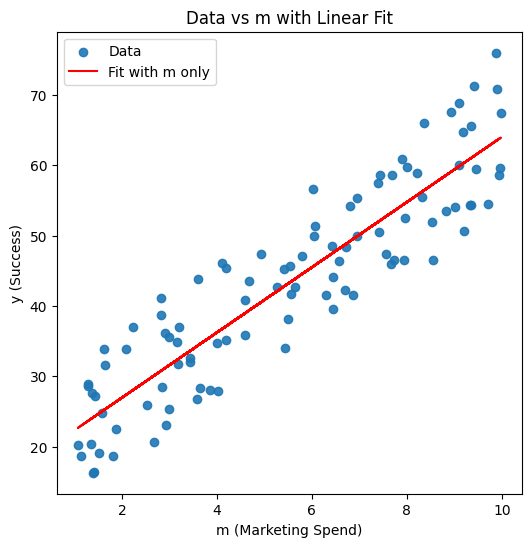

In [28]:
#1 variable Plot
plt.figure(figsize=(6, 6))
plt.title("Data vs m with Linear Fit") #labels
plt.xlabel("m (Marketing Spend)")
plt.ylabel("y (Success)")
plt.scatter(m, y, label="Data", alpha=0.9) #scatter plot
plt.plot(m, y_pred, color="red", label="Fit with m only")
plt.legend()
plt.show()



2.   Using both market spend and word of mouth parameters



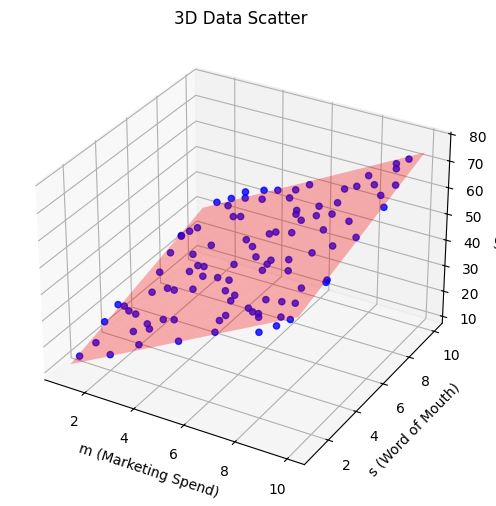

In [29]:
#2 variable (3D) plot
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111,projection="3d")
ax.set_title("3D Data Scatter") #labels
ax.set_xlabel("m (Marketing Spend)")
ax.set_ylabel("s (Word of Mouth)")
ax.set_zlabel("y (Success)")
ax.scatter(m,s,y,c='b',marker='o',alpha=0.8) #scatter plot
m_grid,s_grid=np.meshgrid(np.linspace(1,10,10),np.linspace(1,10,10)); #plotting linear regression (a plane)
A_grid = np.c_[np.ones(m_grid.size), m_grid.ravel(), s_grid.ravel()]
y_grid = A_grid @ theta_best
y_grid = y_grid.reshape(m_grid.shape)
ax.plot_surface(m_grid,s_grid,y_grid,color='r',alpha=0.3)
plt.show()

###Evaluation

After training both models, we compare their performance using the coefficient of determination. This metric tells us how much variance in the data is explained by the model. A significant improvement in R^2 when adding sentiment (s) would confirm the importance of including social signals alongside marketing expenditure. Thus, we move from a simplistic “budget-only” view to a richer model that integrates multiple drivers of product adoption.

In [30]:
#Rsquare comparison
r2_m=r2_score(y, y_pred)
print("R square using m only:", r2_m)
r2_s=r2_score(y, y_predn)
print("R square using both m and s:", r2_s)

R square using m only: 0.8206033392040047
R square using both m and s: 0.9836863793545949
